Say you are saw Tesla Model 3 on the road and you grew curious on how autonomous vehicles work. Well one of the first steps in building an autonomous vehicle is to detect objects in an image and then classify them so that the vehicle can understand what it is seeing. In this notebook, we will explore how to detect objects in an image using a pre-trained model.

To begin with, let's first understand the broad steps involved in object detection. The steps are as follows:
1. *Data Collection:* Collect necessary data to train our model. This data will be used to train and evaluate our model.
2. *Data Preparation:* Prepare the data for training. This includes data augmentation, data cleaning, and data splitting ~ breaking data into training / testing sets.
3. *Model Training:* Train model using the prepared data.
4. *Model Evaluation:* Evaluate the model to see how well it performs on the test data.
5. *Model Deployment:* Deploy the model.

Some of the steps are self-explanatory, but a few of them need a bit more explanation for example in the Data Prepration stage, we say that we prepare the data, what does that mean? Well, when we drive a car, we know various objects that we see on the road but computers do not have any such knowledge. So, we need to teach the computer what objects are and how to detect them. This is done by training a model on a dataset of images that contain the objects we want to detect. Usually, a given training image containing multiple objects would have bounding boxes around each object. The bounding boxes are used to teach the model what objects are in the image and their corresponding locations. The model is also trained to classify the objects into different categories so that if this model is being used in an autonomous vehicle, it can understand what it is seeing and take appropriate action.

In [ ]:
# Title: Image Object Detection
# Description: This notebook shows how to use fastAI library to train an image object detection model

# Install and set up fastAI library
! [ -e /content ] && pip install -Uqq fastbook


# Say we are using fastAI library to train an image segmentation model. Import all the necessary libraries
import fastbook
fastbook.setup_book()

# imports functions and modules from the fastbook library, so that they can be used in the code
# without having to reference
from fastbook import *
from fastai.vision.all import *

In [ ]:
#import the CAMVID dataset
path = untar_data(URLs.CAMVID_TINY)

In [ ]:
# prepare the dataset for training
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)


In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

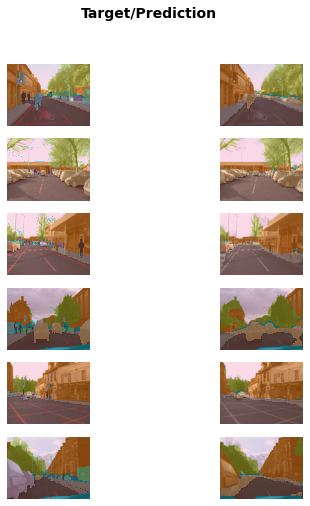

In [13]:
learn.show_results(max_n=6, figsize=(7,8))